## Mini Project : Topic Modeling By using NLP

## Objective:
To identify hidden topics within a large collection of text using Natural Language Processing (NLP) techniques. This helps in organizing, summarizing, and understanding the main themes in the data.


## Import libraries

In [1]:
import nltk
nltk.download('punkt')     
nltk.download('stopwords')    
nltk.download('averaged_perceptron_tagger')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hemavarshini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hemavarshini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hemavarshini\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import nltk
print(nltk.data.path)

['C:\\Users\\Hemavarshini/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Hemavarshini\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [3]:
nltk.data.path.append('C:/Users/Dell/AppData/Roaming/nltk_data')


## Topic Modeling (LDA with Gensim)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from pprint import pprint

nltk.download('punkt')
nltk.download('stopwords')


documents = [
    "Machine learning is amazing.",
    "Deep learning and machine learning are both AI.",
    "Python is great for data science.",
    "Natural language processing uses machine learning."
]


stop_words = set(stopwords.words('english'))
texts = [
    [word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words]
    for doc in documents
]


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)
pprint(lda_model.print_topics())

[(0,
  '0.141*"data" + 0.141*"science" + 0.141*"great" + 0.141*"python" + '
  '0.049*"machine" + 0.049*"amazing" + 0.049*"learning" + 0.048*"processing" + '
  '0.048*"language" + 0.048*"uses"'),
 (1,
  '0.220*"learning" + 0.171*"machine" + 0.073*"natural" + 0.073*"deep" + '
  '0.073*"ai" + 0.073*"uses" + 0.073*"language" + 0.073*"processing" + '
  '0.073*"amazing" + 0.025*"python"')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hemavarshini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hemavarshini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization (NLTK & spaCy)

In [5]:
from nltk.tokenize import word_tokenize
text = "NLP is fun and educational!"
tokens = word_tokenize(text)
print("Word Tokens:", tokens)

from nltk.tokenize import sent_tokenize
sentences = sent_tokenize("This is the first sentence. Here's another.")
print("Sentences:", sentences)


Word Tokens: ['NLP', 'is', 'fun', 'and', 'educational', '!']
Sentences: ['This is the first sentence.', "Here's another."]


## POS Tagging (NLTK & TextBlob)

In [6]:
tokens = word_tokenize("Python is a powerful language.")
pos_tags = nltk.pos_tag(tokens)
print("POS Tags (NLTK):", pos_tags)

from textblob import TextBlob
blob = TextBlob("Python is a powerful language.")
print("POS Tags (TextBlob):", blob.tags)

POS Tags (NLTK): [('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('powerful', 'JJ'), ('language', 'NN'), ('.', '.')]
POS Tags (TextBlob): [('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('powerful', 'JJ'), ('language', 'NN')]


## Chunking (NP Phrase Extraction with NLTK)

In [7]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(pos_tags)
print("Chunking Result:")
print(result)
result.draw() 

Chunking Result:
(S Python/NNP is/VBZ (NP a/DT powerful/JJ language/NN) ./.)


## Named Entity Recognition (NER with spaCy)

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Barack Obama was the 44th President of the United States."
doc = nlp(text)

print("Named Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)

Named Entities:
Barack Obama PERSON
44th ORDINAL
the United States GPE


## TextBlob Features

In [10]:
from textblob import TextBlob

blob = TextBlob("TextBlob is very easy to use. It also provides sentiment analysis.")


print("Noun Phrases:", blob.noun_phrases)

print("Sentiment:", blob.sentiment)

print("POS Tags:", blob.tags)

Noun Phrases: ['textblob', 'sentiment analysis']
Sentiment: Sentiment(polarity=0.5633333333333334, subjectivity=1.0)
POS Tags: [('TextBlob', 'NNP'), ('is', 'VBZ'), ('very', 'RB'), ('easy', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('It', 'PRP'), ('also', 'RB'), ('provides', 'VBZ'), ('sentiment', 'JJ'), ('analysis', 'NN')]


## TF-IDF with Scikit-learn

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    "Python is a great programming language",
    "Machine learning is a part of artificial intelligence",
    "Natural language processing is a field of AI"
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

print("Feature Names:", vectorizer.get_feature_names_out())

TF-IDF Matrix:
[[0.         0.         0.         0.50461134 0.         0.29803159
  0.38376993 0.         0.         0.         0.         0.
  0.         0.50461134 0.50461134]
 [0.         0.41074684 0.         0.         0.41074684 0.2425937
  0.         0.41074684 0.41074684 0.         0.31238356 0.41074684
  0.         0.         0.        ]
 [0.4261835  0.         0.4261835  0.         0.         0.25171084
  0.32412354 0.         0.         0.4261835  0.32412354 0.
  0.4261835  0.         0.        ]]
Feature Names: ['ai' 'artificial' 'field' 'great' 'intelligence' 'is' 'language'
 'learning' 'machine' 'natural' 'of' 'part' 'processing' 'programming'
 'python']


## Word Cloud for Each Topic

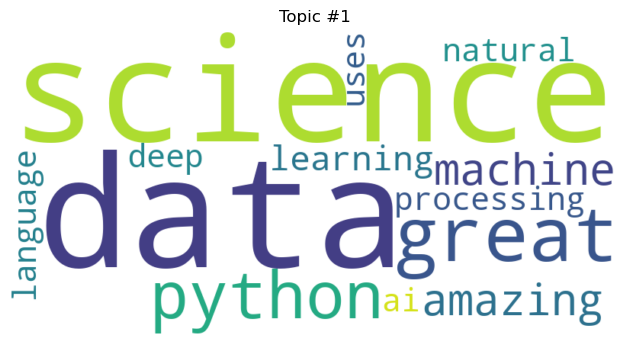

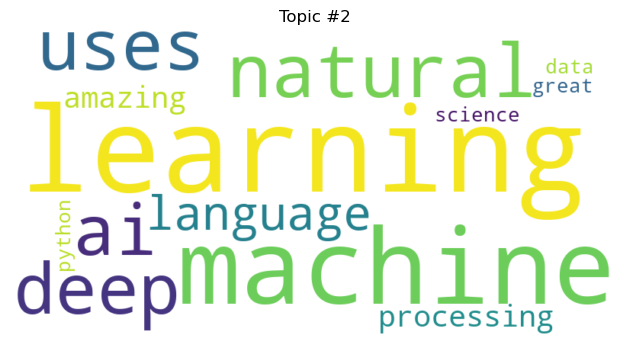

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud for each topic
for topic_id in range(lda_model.num_topics):
    plt.figure()
    plt.title(f"Topic #{topic_id + 1}")
    topic_words = dict(lda_model.show_topic(topic_id, topn=30))  # top 30 words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.show()


## Bar Chart of Top Words per Topic

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\3625288159.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df, palette='coolwarm')


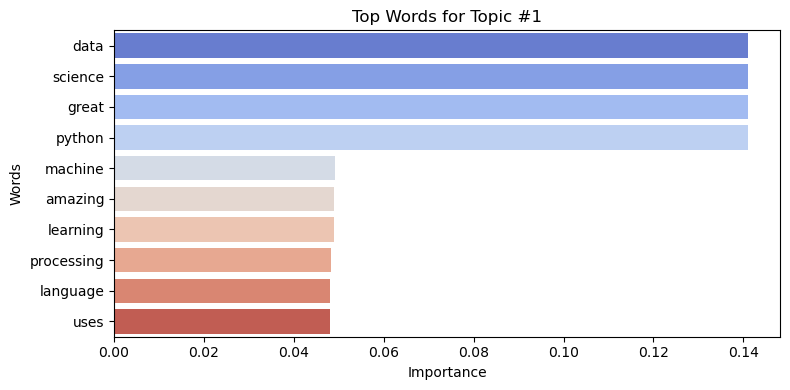

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\3625288159.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df, palette='coolwarm')


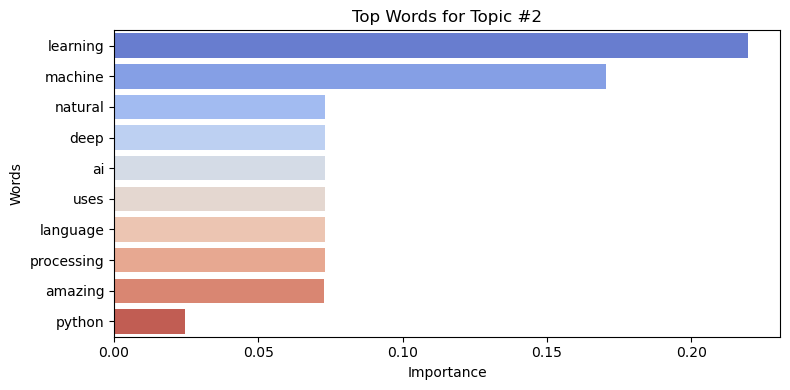

In [8]:
import pandas as pd
import seaborn as sns

# Plot top 10 words for each topic
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=10)
    df = pd.DataFrame(topic_words, columns=['Word', 'Weight'])
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Weight', y='Word', data=df, palette='coolwarm')
    plt.title(f"Top Words for Topic #{topic_id + 1}")
    plt.xlabel("Importance")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


## Topic Distribution per Document

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\91254744.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


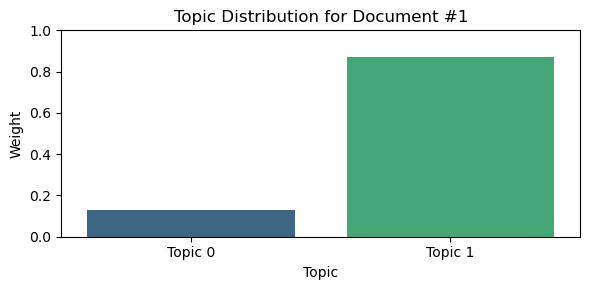

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\91254744.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


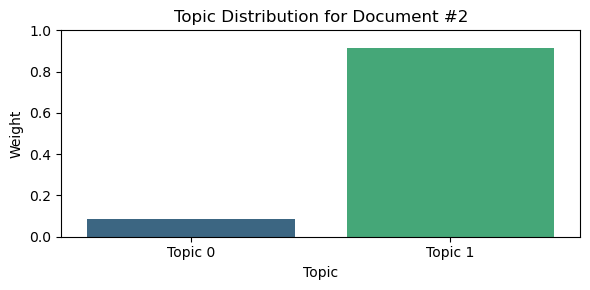

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\91254744.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


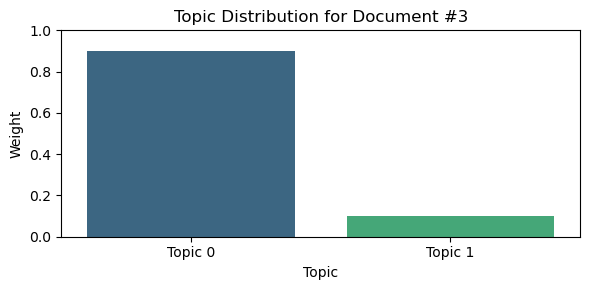

C:\Users\Hemavarshini\AppData\Local\Temp\ipykernel_10788\91254744.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


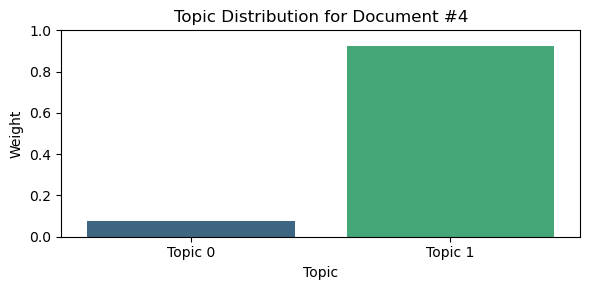

In [9]:
# Visualize topic distribution per document
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

for i, doc in enumerate(doc_topics):
    plt.figure(figsize=(6, 3))
    x = [f"Topic {topic_id}" for topic_id, _ in doc]
    y = [weight for _, weight in doc]
    sns.barplot(x=x, y=y, palette='viridis')
    plt.title(f"Topic Distribution for Document #{i + 1}")
    plt.ylabel("Weight")
    plt.xlabel("Topic")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
